In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as o
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Importando os imóveis em bairros estritamente da Zona Sul
# Os dados abaixo são os adquiridos sem o Q1 da tabela original, considerando apenas bairros com total de imóveis 
# acima do Q1 não normalizado nem padronizado.

dfzl = pd.read_excel(r'tabela_zona_leste.xlsx')
display(dfzl)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,5,2470581699,Zap Imóveis,Belenzinho,Zona Leste,São Paulo,Aluguel,0,598,1780,72,2,0,1,2,24.72,7.484369,-0.906030,3.207613,-0.950709
1,55,2476461357,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,167,400,1850,50,2,0,1,1,37.00,7.522941,-0.853649,3.610918,-0.183701
2,96,2479871904,Zap Imóveis,Chácara Santo Antônio (Zona Leste),Zona Leste,São Paulo,Aluguel,0,60,1260,26,1,0,0,1,48.46,7.138867,-1.375218,3.880739,0.329445
3,102,2480539874,Zap Imóveis,Parque da Mooca,Zona Leste,São Paulo,Aluguel,7,836,1710,70,2,0,1,1,24.43,7.444249,-0.960512,3.195812,-0.973152
4,103,2480733580,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,0,647,1360,92,3,1,1,2,14.78,7.215240,-1.271504,2.693275,-1.928880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10665,227176,2500615711,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,0,305,1750,54,1,0,1,1,32.41,7.467371,-0.929112,3.478467,-0.435597
10666,227177,2500617849,Zap Imóveis,Jardim Vila Formosa,Zona Leste,São Paulo,Aluguel,153,0,1700,120,2,0,4,1,14.17,7.438384,-0.968477,2.651127,-2.009037
10667,227182,2500641517,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,410,900,7000,124,3,1,2,2,56.45,8.853665,0.953463,4.033355,0.619692
10668,227280,69233119,Zap Imóveis,Jardim Anália Franco,Zona Leste,São Paulo,Aluguel,0,0,8000,330,4,4,4,5,24.24,8.987197,1.134797,3.188004,-0.988001


In [3]:
dfzl = dfzl.drop(columns = ['Unnamed: 0'])
display(dfzl)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2470581699,Zap Imóveis,Belenzinho,Zona Leste,São Paulo,Aluguel,0,598,1780,72,2,0,1,2,24.72,7.484369,-0.906030,3.207613,-0.950709
1,2476461357,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,167,400,1850,50,2,0,1,1,37.00,7.522941,-0.853649,3.610918,-0.183701
2,2479871904,Zap Imóveis,Chácara Santo Antônio (Zona Leste),Zona Leste,São Paulo,Aluguel,0,60,1260,26,1,0,0,1,48.46,7.138867,-1.375218,3.880739,0.329445
3,2480539874,Zap Imóveis,Parque da Mooca,Zona Leste,São Paulo,Aluguel,7,836,1710,70,2,0,1,1,24.43,7.444249,-0.960512,3.195812,-0.973152
4,2480733580,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,0,647,1360,92,3,1,1,2,14.78,7.215240,-1.271504,2.693275,-1.928880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10665,2500615711,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,0,305,1750,54,1,0,1,1,32.41,7.467371,-0.929112,3.478467,-0.435597
10666,2500617849,Zap Imóveis,Jardim Vila Formosa,Zona Leste,São Paulo,Aluguel,153,0,1700,120,2,0,4,1,14.17,7.438384,-0.968477,2.651127,-2.009037
10667,2500641517,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,410,900,7000,124,3,1,2,2,56.45,8.853665,0.953463,4.033355,0.619692
10668,69233119,Zap Imóveis,Jardim Anália Franco,Zona Leste,São Paulo,Aluguel,0,0,8000,330,4,4,4,5,24.24,8.987197,1.134797,3.188004,-0.988001


In [4]:
datazl = dfzl.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['max', 'min', 'mean', 'std', 'size'])
display(datazl)

max    min        mean  \
Zona       Bairro                                                            
Zona Leste Alto da Mooca                         190.00  10.86   26.391381   
           Belenzinho                             80.00  13.66   30.204533   
           Belém                                  68.69  10.00   33.009113   
           Bosque da Saúde                        20.62  18.54   19.580000   
           Brás                                 2720.59  10.00   36.328752   
           Cambuci                                32.86  14.00   21.090000   
           Catumbi                                65.15  11.08   32.560952   
           Chácara Santo Antônio                  26.67  26.67   26.670000   
           Chácara Santo Antônio (Zona Leste)     80.17  10.62   31.562885   
           Conjunto Habitacional A E Carv         20.00  20.00   20.000000   
           Jardim Anália Franco                  109.89   3.33   31.964069   
           Jardim Vila Formosa                  1740.83   7.39   39.402449   
           Mooca                                 103.00   7.81   28.022615   
           Parque São Jorge                      166.67  11.76   29.822813   
           Parque da Mooca                        63.33   8.13   25.544417   
           Ponte Pequena                          82.29  33.33   52.793333   
           Quarta Parada                         155.09  11.33   36.132135   
           Sé                                     76.00  16.67   50.942414   
           Tatuapé                               171.88   6.00   30.133457   
           Vila Bertioga                       10975.61   6.67  123.033651   
           Vila Cruzeiro                          18.40  18.40   18.400000   
           Vila Formosa                          206.90   3.28   25.047239   
           Vila Guarani                           17.14  17.14   17.140000   
           Vila Invernada                       3142.86   9.00   60.125778   
           Vila Prudente                         220.00   2.58   28.387368   
           Vila Regente Feijó                     87.72   5.54   35.806865   

                                                      std  size  
Zona       Bairro                                                
Zona Leste Alto da Mooca                        15.343927   239  
           Belenzinho                            9.223276   300  
           Belém                                10.987664   451  
           Bosque da Saúde                       1.470782     2  
           Brás                                 81.188171  1130  
           Cambuci                               6.805745     8  
           Catumbi                              14.673204    21  
           Chácara Santo Antônio                      NaN     1  
           Chácara Santo Antônio (Zona Leste)   17.597694    52  
           Conjunto Habitacional A E Carv             NaN     1  
           Jardim Anália Franco                 15.885296   806  
           Jardim Vila Formosa                 173.821231    98  
           Mooca                                14.131144   566  
           Parque São Jorge                     20.950322    64  
           Parque da Mooca                       9.796035   163  
           Ponte Pequena                        25.976359     3  
           Quarta Parada                        28.207384    89  
           Sé                                   10.295979    29  
           Tatuapé                              12.279906  3438  
           Vila Bertioga                       944.560329   189  
           Vila Cruzeiro                              NaN     1  
           Vila Formosa                         12.103479   920  
           Vila Guarani                               NaN     1  
           Vila Invernada                      328.790452    90  
           Vila Prudente                        13.403499   984  
           Vila Regente Feijó                   14.997419  1024

In [5]:
dfzl.isna().any().sum()

2

In [6]:
dfzl.dropna(inplace=True)
dfzl.isna().any().sum()

0

In [7]:
# Coletando a mediana e o Q3 da tabela zona sul

mediana = np.percentile(dfzl.Aluguel_m2, 50)
q3 = np.percentile(dfzl.Aluguel_m2, 75)
print(mediana)
print(q3)

27.97
36.92


In [9]:
# Separando os imóveis cujos aluguéis se encontram entre a mediana e o Q3

df___ = dfzl[(dfzl.Aluguel_m2 >= mediana) & (dfzl.Aluguel_m2 <= q3)]
print(df___)

        Id_Oferta       Portal                Bairro        Zona     Cidade  \
8      2475998780  Zap Imóveis    Vila Regente Feijó  Zona Leste  São Paulo   
12     2477330905  Zap Imóveis                 Mooca  Zona Leste  São Paulo   
14     2477743481  Zap Imóveis    Vila Regente Feijó  Zona Leste  São Paulo   
18     2475395837  Zap Imóveis                 Mooca  Zona Leste  São Paulo   
19     2476004389  Zap Imóveis          Vila Formosa  Zona Leste  São Paulo   
...           ...          ...                   ...         ...        ...   
10652  2500540973  Zap Imóveis               Tatuapé  Zona Leste  São Paulo   
10655  2500541109  Zap Imóveis               Tatuapé  Zona Leste  São Paulo   
10659  2500576987  Zap Imóveis         Vila Prudente  Zona Leste  São Paulo   
10665  2500615711  Zap Imóveis          Vila Formosa  Zona Leste  São Paulo   
10669    90529492  Zap Imóveis  Jardim Anália Franco  Zona Leste  São Paulo   

        Status  Valor_Iptu  Valor_Condominio  Valor

In [10]:
df_l = pd.DataFrame(data=df___)
display(df_l)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
8,2475998780,Zap Imóveis,Vila Regente Feijó,Zona Leste,São Paulo,Aluguel,0,1600,4500,156,3,3,3,3,28.85,8.411833,0.353458,3.362110,-0.656885
12,2477330905,Zap Imóveis,Mooca,Zona Leste,São Paulo,Aluguel,25,754,2093,59,2,1,0,2,35.47,7.646354,-0.686055,3.568687,-0.264016
14,2477743481,Zap Imóveis,Vila Regente Feijó,Zona Leste,São Paulo,Aluguel,0,0,4500,156,3,3,3,0,28.85,8.411833,0.353458,3.362110,-0.656885
18,2475395837,Zap Imóveis,Mooca,Zona Leste,São Paulo,Aluguel,190,700,2900,88,3,1,2,2,32.95,7.972466,-0.243198,3.494991,-0.404171
19,2476004389,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,250,0,1350,45,2,0,1,1,30.00,7.207860,-1.281526,3.401197,-0.582549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10652,2500540973,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,58,1270,3060,98,3,1,1,3,31.22,8.026170,-0.170268,3.441059,-0.506740
10655,2500541109,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,100,500,1800,62,3,1,1,2,29.03,7.495542,-0.890856,3.368330,-0.645057
10659,2500576987,Zap Imóveis,Vila Prudente,Zona Leste,São Paulo,Aluguel,50,620,2500,75,3,1,2,2,33.33,7.824046,-0.444751,3.506458,-0.382364
10665,2500615711,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,0,305,1750,54,1,0,1,1,32.41,7.467371,-0.929112,3.478467,-0.435597


In [11]:
# Agrupando as métricas básicas dos Bairros da zona sul

datatable1 = df_l.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable1)

min    max       mean  \
Zona       Bairro                                                        
Zona Leste Alto da Mooca                       28.26  36.67  31.879333   
           Belenzinho                          28.17  36.76  32.326392   
           Belém                               28.11  36.80  32.021210   
           Brás                                28.00  36.92  32.314627   
           Cambuci                             28.12  32.86  30.490000   
           Catumbi                             32.00  36.00  33.078333   
           Chácara Santo Antônio (Zona Leste)  28.12  34.29  31.157000   
           Jardim Anália Franco                27.97  36.92  32.051570   
           Jardim Vila Formosa                 29.63  36.67  32.853889   
           Mooca                               28.00  36.76  31.768235   
           Parque São Jorge                    28.10  36.47  31.282857   
           Parque da Mooca                     28.46  35.71  31.355294   
           Ponte Pequena                       33.33  33.33  33.330000   
           Quarta Parada                       28.95  36.36  33.536111   
           Tatuapé                             28.00  36.92  32.378203   
           Vila Bertioga                       28.00  36.84  31.990000   
           Vila Formosa                        28.00  36.86  32.021520   
           Vila Invernada                      30.00  36.90  32.751667   
           Vila Prudente                       27.97  36.89  32.274861   
           Vila Regente Feijó                  28.09  36.92  32.492123   

                                                    std  size  
Zona       Bairro                                              
Zona Leste Alto da Mooca                       2.097288    45  
           Belenzinho                          2.523685    97  
           Belém                               2.228759   124  
           Brás                                2.529470   335  
           Cambuci                             3.351686     2  
           Catumbi                             1.640249     6  
           Chácara Santo Antônio (Zona Leste)  2.410915    10  
           Jardim Anália Franco                2.606779   172  
           Jardim Vila Formosa                 2.091833    18  
           Mooca                               2.508022   136  
           Parque São Jorge                    2.869568    14  
           Parque da Mooca                     2.080785    34  
           Ponte Pequena                            NaN     1  
           Quarta Parada                       2.204429    18  
           Tatuapé                             2.575904   957  
           Vila Bertioga                       2.657409    50  
           Vila Formosa                        2.546451   171  
           Vila Invernada                      2.651013    12  
           Vila Prudente                       2.494075   288  
           Vila Regente Feijó                  2.697496   179

In [12]:
# Tratando os NaN

datatable1.replace(np.nan, 0, inplace=True)
display(datatable1)

min    max       mean  \
Zona       Bairro                                                        
Zona Leste Alto da Mooca                       28.26  36.67  31.879333   
           Belenzinho                          28.17  36.76  32.326392   
           Belém                               28.11  36.80  32.021210   
           Brás                                28.00  36.92  32.314627   
           Cambuci                             28.12  32.86  30.490000   
           Catumbi                             32.00  36.00  33.078333   
           Chácara Santo Antônio (Zona Leste)  28.12  34.29  31.157000   
           Jardim Anália Franco                27.97  36.92  32.051570   
           Jardim Vila Formosa                 29.63  36.67  32.853889   
           Mooca                               28.00  36.76  31.768235   
           Parque São Jorge                    28.10  36.47  31.282857   
           Parque da Mooca                     28.46  35.71  31.355294   
           Ponte Pequena                       33.33  33.33  33.330000   
           Quarta Parada                       28.95  36.36  33.536111   
           Tatuapé                             28.00  36.92  32.378203   
           Vila Bertioga                       28.00  36.84  31.990000   
           Vila Formosa                        28.00  36.86  32.021520   
           Vila Invernada                      30.00  36.90  32.751667   
           Vila Prudente                       27.97  36.89  32.274861   
           Vila Regente Feijó                  28.09  36.92  32.492123   

                                                    std  size  
Zona       Bairro                                              
Zona Leste Alto da Mooca                       2.097288    45  
           Belenzinho                          2.523685    97  
           Belém                               2.228759   124  
           Brás                                2.529470   335  
           Cambuci                             3.351686     2  
           Catumbi                             1.640249     6  
           Chácara Santo Antônio (Zona Leste)  2.410915    10  
           Jardim Anália Franco                2.606779   172  
           Jardim Vila Formosa                 2.091833    18  
           Mooca                               2.508022   136  
           Parque São Jorge                    2.869568    14  
           Parque da Mooca                     2.080785    34  
           Ponte Pequena                       0.000000     1  
           Quarta Parada                       2.204429    18  
           Tatuapé                             2.575904   957  
           Vila Bertioga                       2.657409    50  
           Vila Formosa                        2.546451   171  
           Vila Invernada                      2.651013    12  
           Vila Prudente                       2.494075   288  
           Vila Regente Feijó                  2.697496   179

In [13]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatable2 = df_l.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable2)

min    max       mean       std  \
Zona       Bairro             Dormitorios                                      
Zona Leste Alto da Mooca      1            30.00  35.00  32.220000  1.818553   
                              2            28.26  36.67  31.823684  2.504024   
                              3            28.57  36.36  31.958333  1.753844   
                              4            29.13  29.13  29.130000       NaN   
           Belenzinho         1            28.33  35.00  32.010667  2.094413   
...                                          ...    ...        ...       ...   
           Vila Prudente      3            27.97  36.49  32.382174  2.619077   
           Vila Regente Feijó 1            28.85  36.91  33.308696  2.643664   
                              2            28.57  36.92  32.621915  2.979866   
                              3            28.09  36.88  32.223458  2.563737   
                              4            32.85  36.00  34.425000  2.227386   

                                           size  
Zona       Bairro             Dormitorios        
Zona Leste Alto da Mooca      1               7  
                              2              19  
                              3              18  
                              4               1  
           Belenzinho         1              15  
...                                         ...  
           Vila Prudente      3              69  
           Vila Regente Feijó 1              23  
                              2              47  
                              3             107  
                              4               2  

[65 rows x 5 columns]

In [14]:
# Tratando os NaN

datatable2.replace(np.nan, 0, inplace=True)
display(datatable2)

min    max       mean       std  \
Zona       Bairro             Dormitorios                                      
Zona Leste Alto da Mooca      1            30.00  35.00  32.220000  1.818553   
                              2            28.26  36.67  31.823684  2.504024   
                              3            28.57  36.36  31.958333  1.753844   
                              4            29.13  29.13  29.130000  0.000000   
           Belenzinho         1            28.33  35.00  32.010667  2.094413   
...                                          ...    ...        ...       ...   
           Vila Prudente      3            27.97  36.49  32.382174  2.619077   
           Vila Regente Feijó 1            28.85  36.91  33.308696  2.643664   
                              2            28.57  36.92  32.621915  2.979866   
                              3            28.09  36.88  32.223458  2.563737   
                              4            32.85  36.00  34.425000  2.227386   

                                           size  
Zona       Bairro             Dormitorios        
Zona Leste Alto da Mooca      1               7  
                              2              19  
                              3              18  
                              4               1  
           Belenzinho         1              15  
...                                         ...  
           Vila Prudente      3              69  
           Vila Regente Feijó 1              23  
                              2              47  
                              3             107  
                              4               2  

[65 rows x 5 columns]

<AxesSubplot:ylabel='Frequency'>

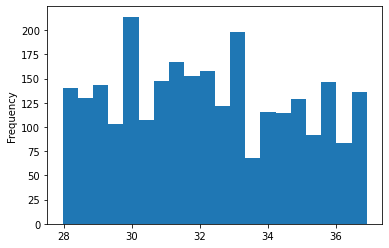

In [15]:
# Visualizando um Histograma simples

df_l['Aluguel_m2'].plot.hist(bins=20)

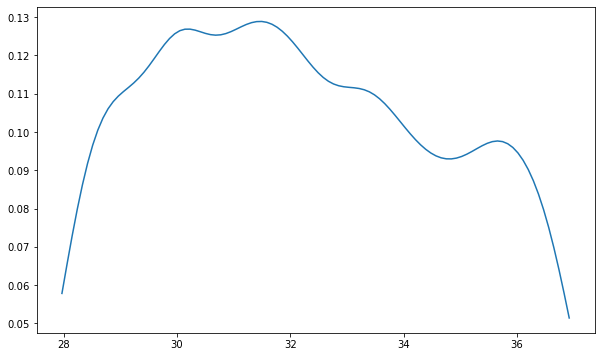

In [16]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(10,6))
# estabelecendo os dados
data = df_l['Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Vila Regente Feijó'),
  Text(1, 0, 'Mooca'),
  Text(2, 0, 'Vila Formosa'),
  Text(3, 0, 'Tatuapé'),
  Text(4, 0, 'Parque da Mooca'),
  Text(5, 0, 'Parque São Jorge'),
  Text(6, 0, 'Vila Bertioga'),
  Text(7, 0, 'Chácara Santo Antônio (Zona Leste)'),
  Text(8, 0, 'Brás'),
  Text(9, 0, 'Belenzinho'),
  Text(10, 0, 'Quarta Parada'),
  Text(11, 0, 'Jardim Anália Franco'),
  Text(12, 0, 'Alto da Mooca'),
  Text(13, 0, 'Vila Prudente'),
  Text(14, 0, 'Jardim Vila Formosa'),
  Text(15, 0, 'Cambuci'),
  Text(16, 0, 'Belém'),
  Text(17, 0, 'Catumbi'),
  Text(18, 0, 'Vila Invernada'),
  Text(19, 0, 'Ponte Pequena')])

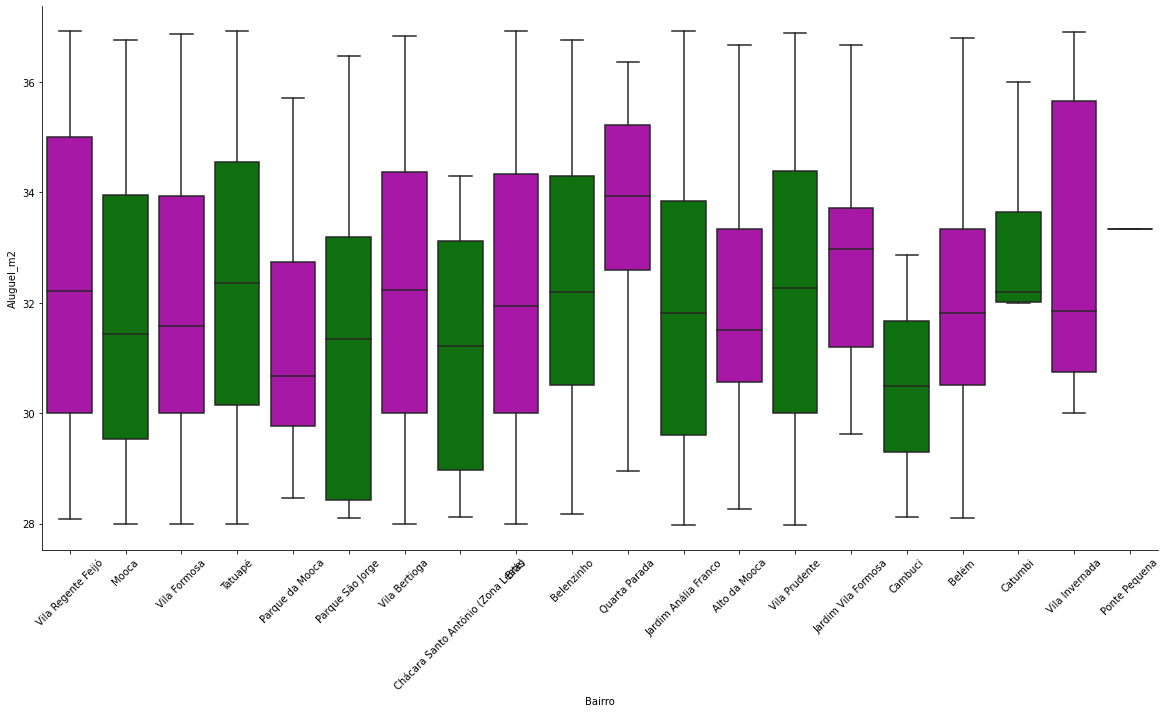

In [17]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(20,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_l)
sns.despine()
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Vila Regente Feijó'),
  Text(1, 0, 'Mooca'),
  Text(2, 0, 'Vila Formosa'),
  Text(3, 0, 'Tatuapé'),
  Text(4, 0, 'Parque da Mooca'),
  Text(5, 0, 'Parque São Jorge'),
  Text(6, 0, 'Vila Bertioga'),
  Text(7, 0, 'Chácara Santo Antônio (Zona Leste)'),
  Text(8, 0, 'Brás'),
  Text(9, 0, 'Belenzinho'),
  Text(10, 0, 'Quarta Parada'),
  Text(11, 0, 'Jardim Anália Franco'),
  Text(12, 0, 'Alto da Mooca'),
  Text(13, 0, 'Vila Prudente'),
  Text(14, 0, 'Jardim Vila Formosa'),
  Text(15, 0, 'Cambuci'),
  Text(16, 0, 'Belém'),
  Text(17, 0, 'Catumbi'),
  Text(18, 0, 'Vila Invernada'),
  Text(19, 0, 'Ponte Pequena')])

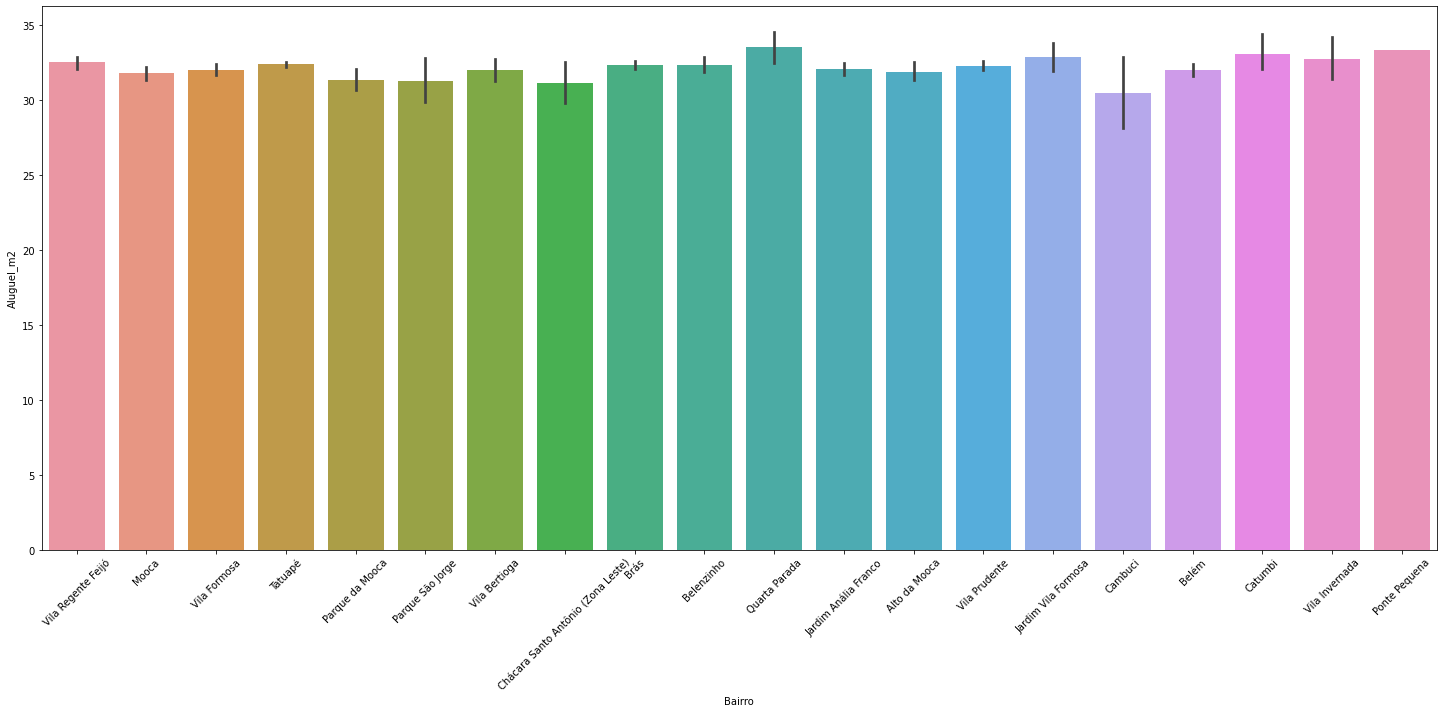

In [19]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_l['Bairro'], y = df_l['Aluguel_m2'])
plt.xticks(rotation=45)

#    
#    
### Padronizando os valores para Log

In [20]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='Frequency'>

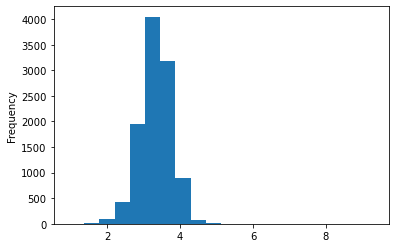

In [21]:
dfzl['log_Aluguel_m2'] = np.log(dfzl['Aluguel_m2'])
dfzl['log_Aluguel_m2'].plot.hist(bins=20)

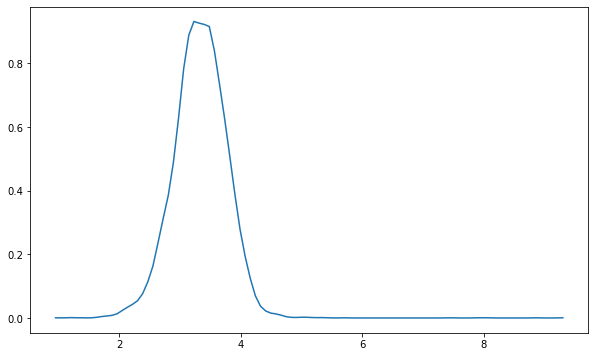

In [22]:
plt.figure(figsize=(10,6))
# estabelecendo os dados
data = dfzl['log_Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

In [23]:
# definindo os dados
x_zl = dfzl['log_Aluguel_m2']
# calculando a média 
mu_zl = np.mean(x_zl)
# calculando o desvio=padrão (utilizando o padrão para o Python)
std_zl = np.std(x_zl)
print('Média Zona Sul: {}'.format(mu_zl))
print('Desvio Padrão Zona Sul: {}'.format(std_zl))

Média Zona Sul: 3.3286834807950476
Desvio Padrão Zona Sul: 0.43857206520411485


In [24]:
# Coletando a mediana e o Q3 da tabela zona sul

medianalog = np.percentile(dfzl.log_Aluguel_m2, 50)
q3log = np.percentile(dfzl.log_Aluguel_m2, 75)
print(medianalog)
print(q3log)

3.3311325072138684
3.6087534096346516


In [25]:
df_log = dfzl[(dfzl.log_Aluguel_m2 >= medianalog) & (dfzl.log_Aluguel_m2 <= q3log)]
print(df_log)

        Id_Oferta       Portal                Bairro        Zona     Cidade  \
8      2475998780  Zap Imóveis    Vila Regente Feijó  Zona Leste  São Paulo   
12     2477330905  Zap Imóveis                 Mooca  Zona Leste  São Paulo   
14     2477743481  Zap Imóveis    Vila Regente Feijó  Zona Leste  São Paulo   
18     2475395837  Zap Imóveis                 Mooca  Zona Leste  São Paulo   
19     2476004389  Zap Imóveis          Vila Formosa  Zona Leste  São Paulo   
...           ...          ...                   ...         ...        ...   
10652  2500540973  Zap Imóveis               Tatuapé  Zona Leste  São Paulo   
10655  2500541109  Zap Imóveis               Tatuapé  Zona Leste  São Paulo   
10659  2500576987  Zap Imóveis         Vila Prudente  Zona Leste  São Paulo   
10665  2500615711  Zap Imóveis          Vila Formosa  Zona Leste  São Paulo   
10669    90529492  Zap Imóveis  Jardim Anália Franco  Zona Leste  São Paulo   

        Status  Valor_Iptu  Valor_Condominio  Valor

In [26]:
df_log = pd.DataFrame(data=df_log)
display(df_log)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
8,2475998780,Zap Imóveis,Vila Regente Feijó,Zona Leste,São Paulo,Aluguel,0,1600,4500,156,3,3,3,3,28.85,8.411833,0.353458,3.362110,-0.656885
12,2477330905,Zap Imóveis,Mooca,Zona Leste,São Paulo,Aluguel,25,754,2093,59,2,1,0,2,35.47,7.646354,-0.686055,3.568687,-0.264016
14,2477743481,Zap Imóveis,Vila Regente Feijó,Zona Leste,São Paulo,Aluguel,0,0,4500,156,3,3,3,0,28.85,8.411833,0.353458,3.362110,-0.656885
18,2475395837,Zap Imóveis,Mooca,Zona Leste,São Paulo,Aluguel,190,700,2900,88,3,1,2,2,32.95,7.972466,-0.243198,3.494991,-0.404171
19,2476004389,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,250,0,1350,45,2,0,1,1,30.00,7.207860,-1.281526,3.401197,-0.582549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10652,2500540973,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,58,1270,3060,98,3,1,1,3,31.22,8.026170,-0.170268,3.441059,-0.506740
10655,2500541109,Zap Imóveis,Tatuapé,Zona Leste,São Paulo,Aluguel,100,500,1800,62,3,1,1,2,29.03,7.495542,-0.890856,3.368330,-0.645057
10659,2500576987,Zap Imóveis,Vila Prudente,Zona Leste,São Paulo,Aluguel,50,620,2500,75,3,1,2,2,33.33,7.824046,-0.444751,3.506458,-0.382364
10665,2500615711,Zap Imóveis,Vila Formosa,Zona Leste,São Paulo,Aluguel,0,305,1750,54,1,0,1,1,32.41,7.467371,-0.929112,3.478467,-0.435597


In [27]:
# Agrupando as métricas básicas da tabela padronizada dos Bairros da zona sul para aluguel/m2

datatablelog1 = df_log.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog1)

min    max       mean  \
Zona       Bairro                                                        
Zona Leste Alto da Mooca                       28.26  36.67  31.879333   
           Belenzinho                          28.17  36.76  32.326392   
           Belém                               28.11  36.80  32.021210   
           Brás                                28.00  36.92  32.314627   
           Cambuci                             28.12  32.86  30.490000   
           Catumbi                             32.00  36.00  33.078333   
           Chácara Santo Antônio (Zona Leste)  28.12  34.29  31.157000   
           Jardim Anália Franco                27.97  36.92  32.051570   
           Jardim Vila Formosa                 29.63  36.67  32.853889   
           Mooca                               28.00  36.76  31.768235   
           Parque São Jorge                    28.10  36.47  31.282857   
           Parque da Mooca                     28.46  35.71  31.355294   
           Ponte Pequena                       33.33  33.33  33.330000   
           Quarta Parada                       28.95  36.36  33.536111   
           Tatuapé                             28.00  36.92  32.378203   
           Vila Bertioga                       28.00  36.84  31.990000   
           Vila Formosa                        28.00  36.86  32.021520   
           Vila Invernada                      30.00  36.90  32.751667   
           Vila Prudente                       27.97  36.89  32.274861   
           Vila Regente Feijó                  28.09  36.92  32.492123   

                                                    std  size  
Zona       Bairro                                              
Zona Leste Alto da Mooca                       2.097288    45  
           Belenzinho                          2.523685    97  
           Belém                               2.228759   124  
           Brás                                2.529470   335  
           Cambuci                             3.351686     2  
           Catumbi                             1.640249     6  
           Chácara Santo Antônio (Zona Leste)  2.410915    10  
           Jardim Anália Franco                2.606779   172  
           Jardim Vila Formosa                 2.091833    18  
           Mooca                               2.508022   136  
           Parque São Jorge                    2.869568    14  
           Parque da Mooca                     2.080785    34  
           Ponte Pequena                            NaN     1  
           Quarta Parada                       2.204429    18  
           Tatuapé                             2.575904   957  
           Vila Bertioga                       2.657409    50  
           Vila Formosa                        2.546451   171  
           Vila Invernada                      2.651013    12  
           Vila Prudente                       2.494075   288  
           Vila Regente Feijó                  2.697496   179

In [28]:
# Tratando os NaN

datatablelog1.replace(np.nan, 0, inplace=True)
display(datatablelog1)

min    max       mean  \
Zona       Bairro                                                        
Zona Leste Alto da Mooca                       28.26  36.67  31.879333   
           Belenzinho                          28.17  36.76  32.326392   
           Belém                               28.11  36.80  32.021210   
           Brás                                28.00  36.92  32.314627   
           Cambuci                             28.12  32.86  30.490000   
           Catumbi                             32.00  36.00  33.078333   
           Chácara Santo Antônio (Zona Leste)  28.12  34.29  31.157000   
           Jardim Anália Franco                27.97  36.92  32.051570   
           Jardim Vila Formosa                 29.63  36.67  32.853889   
           Mooca                               28.00  36.76  31.768235   
           Parque São Jorge                    28.10  36.47  31.282857   
           Parque da Mooca                     28.46  35.71  31.355294   
           Ponte Pequena                       33.33  33.33  33.330000   
           Quarta Parada                       28.95  36.36  33.536111   
           Tatuapé                             28.00  36.92  32.378203   
           Vila Bertioga                       28.00  36.84  31.990000   
           Vila Formosa                        28.00  36.86  32.021520   
           Vila Invernada                      30.00  36.90  32.751667   
           Vila Prudente                       27.97  36.89  32.274861   
           Vila Regente Feijó                  28.09  36.92  32.492123   

                                                    std  size  
Zona       Bairro                                              
Zona Leste Alto da Mooca                       2.097288    45  
           Belenzinho                          2.523685    97  
           Belém                               2.228759   124  
           Brás                                2.529470   335  
           Cambuci                             3.351686     2  
           Catumbi                             1.640249     6  
           Chácara Santo Antônio (Zona Leste)  2.410915    10  
           Jardim Anália Franco                2.606779   172  
           Jardim Vila Formosa                 2.091833    18  
           Mooca                               2.508022   136  
           Parque São Jorge                    2.869568    14  
           Parque da Mooca                     2.080785    34  
           Ponte Pequena                       0.000000     1  
           Quarta Parada                       2.204429    18  
           Tatuapé                             2.575904   957  
           Vila Bertioga                       2.657409    50  
           Vila Formosa                        2.546451   171  
           Vila Invernada                      2.651013    12  
           Vila Prudente                       2.494075   288  
           Vila Regente Feijó                  2.697496   179

In [29]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatablelog2 = df_log.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog2)

min    max       mean       std  \
Zona       Bairro             Dormitorios                                      
Zona Leste Alto da Mooca      1            30.00  35.00  32.220000  1.818553   
                              2            28.26  36.67  31.823684  2.504024   
                              3            28.57  36.36  31.958333  1.753844   
                              4            29.13  29.13  29.130000       NaN   
           Belenzinho         1            28.33  35.00  32.010667  2.094413   
...                                          ...    ...        ...       ...   
           Vila Prudente      3            27.97  36.49  32.382174  2.619077   
           Vila Regente Feijó 1            28.85  36.91  33.308696  2.643664   
                              2            28.57  36.92  32.621915  2.979866   
                              3            28.09  36.88  32.223458  2.563737   
                              4            32.85  36.00  34.425000  2.227386   

                                           size  
Zona       Bairro             Dormitorios        
Zona Leste Alto da Mooca      1               7  
                              2              19  
                              3              18  
                              4               1  
           Belenzinho         1              15  
...                                         ...  
           Vila Prudente      3              69  
           Vila Regente Feijó 1              23  
                              2              47  
                              3             107  
                              4               2  

[65 rows x 5 columns]

In [30]:
datatablelog2.replace(np.nan, 0, inplace=True)
display(datatablelog2)

min    max       mean       std  \
Zona       Bairro             Dormitorios                                      
Zona Leste Alto da Mooca      1            30.00  35.00  32.220000  1.818553   
                              2            28.26  36.67  31.823684  2.504024   
                              3            28.57  36.36  31.958333  1.753844   
                              4            29.13  29.13  29.130000  0.000000   
           Belenzinho         1            28.33  35.00  32.010667  2.094413   
...                                          ...    ...        ...       ...   
           Vila Prudente      3            27.97  36.49  32.382174  2.619077   
           Vila Regente Feijó 1            28.85  36.91  33.308696  2.643664   
                              2            28.57  36.92  32.621915  2.979866   
                              3            28.09  36.88  32.223458  2.563737   
                              4            32.85  36.00  34.425000  2.227386   

                                           size  
Zona       Bairro             Dormitorios        
Zona Leste Alto da Mooca      1               7  
                              2              19  
                              3              18  
                              4               1  
           Belenzinho         1              15  
...                                         ...  
           Vila Prudente      3              69  
           Vila Regente Feijó 1              23  
                              2              47  
                              3             107  
                              4               2  

[65 rows x 5 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

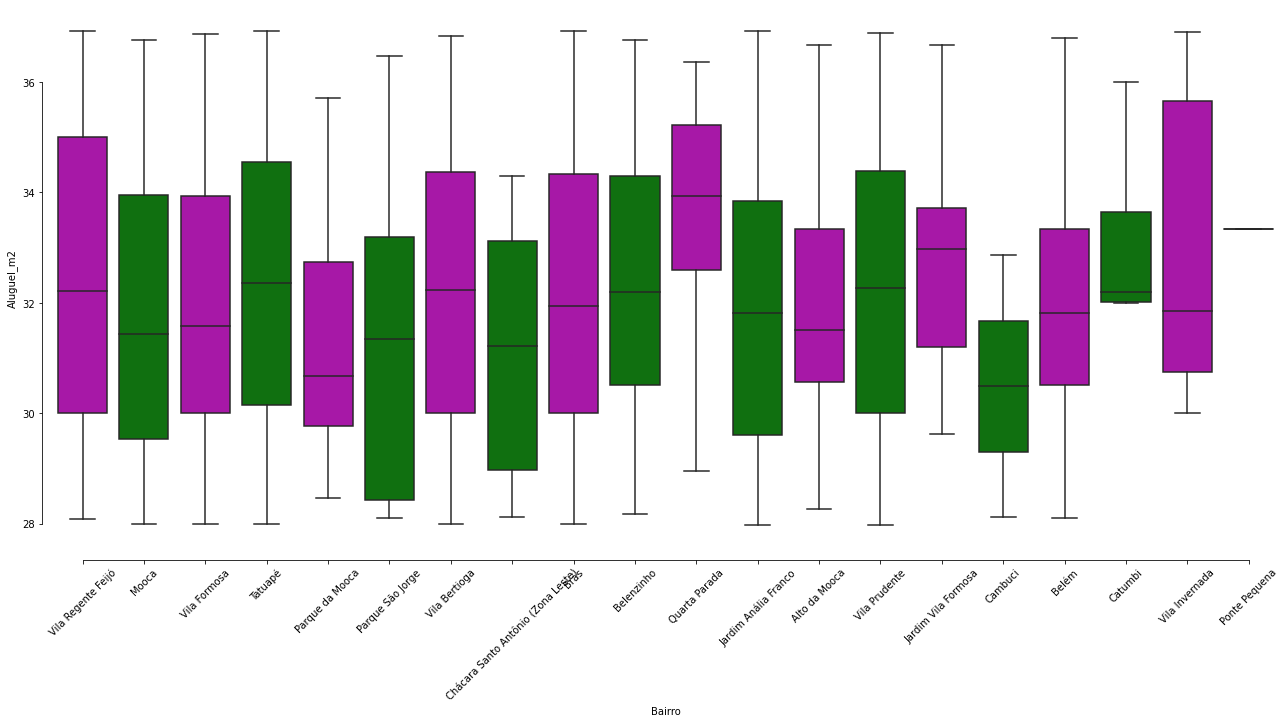

In [32]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(22,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_log)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Vila Regente Feijó'),
  Text(1, 0, 'Mooca'),
  Text(2, 0, 'Vila Formosa'),
  Text(3, 0, 'Tatuapé'),
  Text(4, 0, 'Parque da Mooca'),
  Text(5, 0, 'Parque São Jorge'),
  Text(6, 0, 'Vila Bertioga'),
  Text(7, 0, 'Chácara Santo Antônio (Zona Leste)'),
  Text(8, 0, 'Brás'),
  Text(9, 0, 'Belenzinho'),
  Text(10, 0, 'Quarta Parada'),
  Text(11, 0, 'Jardim Anália Franco'),
  Text(12, 0, 'Alto da Mooca'),
  Text(13, 0, 'Vila Prudente'),
  Text(14, 0, 'Jardim Vila Formosa'),
  Text(15, 0, 'Cambuci'),
  Text(16, 0, 'Belém'),
  Text(17, 0, 'Catumbi'),
  Text(18, 0, 'Vila Invernada'),
  Text(19, 0, 'Ponte Pequena')])

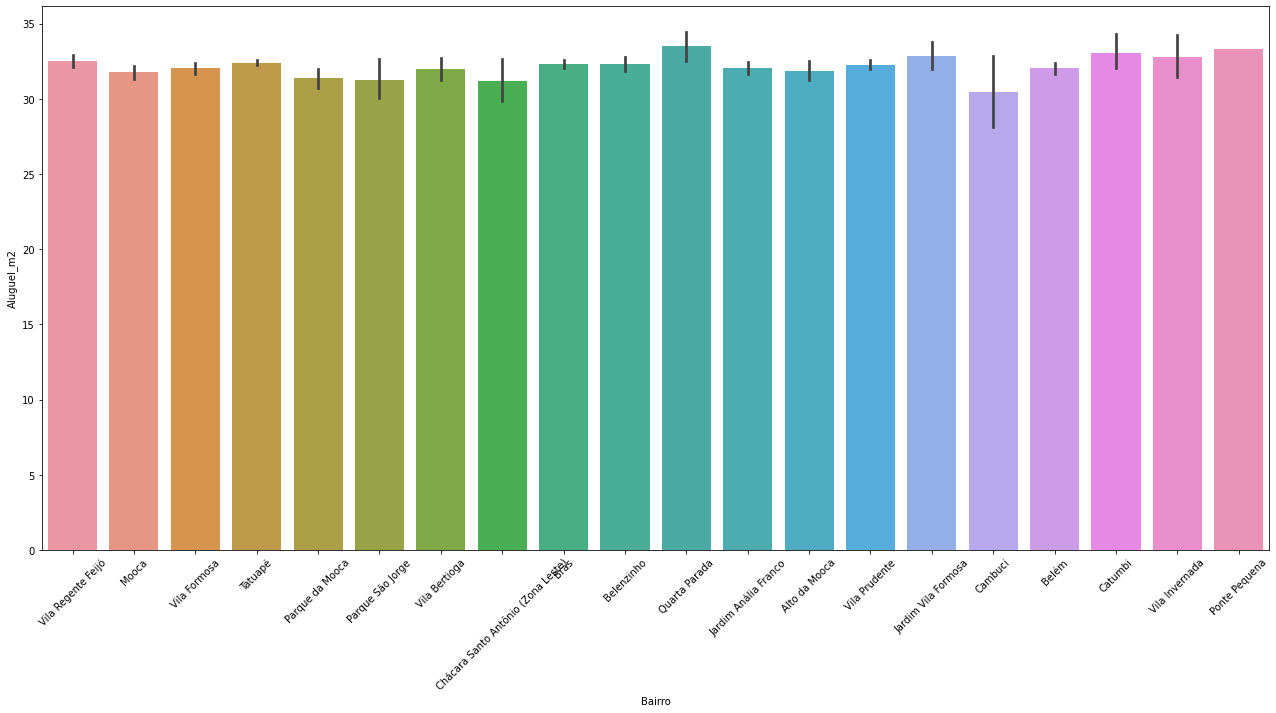

In [33]:
plt.figure(figsize=(22,10))
sns.barplot(x = df_log['Bairro'], y = df_log['Aluguel_m2'])
plt.xticks(rotation=45)